# 2 Introduction to Tidy Finance

## 2.1 Working with Stock Market Data
To avoid the warning message "The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead. df.index+= _pd.TimedeltaIndex(dst-error_hours,'h')," upgrade `yfinance=0.2.40` (from `yfinance=0.2.31`) in the `requirements.txt` (see https://stackoverflow.com/questions/78077101/how-to-use-pd-to-timedelta-with-yfinacne-download).

Add the package `stargazer` into the `requirements.txt`.

Update the latest data to 2024-06-30 (from 2022-12-31). 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

prices = (
    yf.download(
        tickers='AAPL',
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
    .reset_index()
    .assign(symbol="AAPL")
    .rename(columns={
        "Date": "date",
        "Open": "open",
        "High": "high",
        "Low": "low",
        "Close": "close",
        "Adj Close": "adjusted",
        "Volume": "volume"
    }
    )
)

prices.round(3)

,date,open,high,low,close,adjusted,volume,symbol
0,2000-01-03,0.936,1.004,0.908,0.999,0.844,535796800,AAPL
1,2000-01-04,0.967,0.988,0.903,0.915,0.773,512377600,AAPL
2,2000-01-05,0.926,0.987,0.920,0.929,0.784,778321600,AAPL
3,2000-01-06,0.948,0.955,0.848,0.848,0.716,767972800,AAPL
4,2000-01-07,0.862,0.902,0.853,0.888,0.750,460734400,AAPL
...,...,...,...,...,...,...,...,...
6156,2024-06-24,207.720,212.700,206.590,208.140,207.899,80727000,AAPL
6157,2024-06-25,209.150,211.380,208.610,209.070,208.828,56713900,AAPL
6158,2024-06-26,211.500,214.860,210.640,213.250,213.003,66213200,AAPL
6159,2024-06-27,214.690,215.740,212.350,214.100,213.852,49772700,AAPL


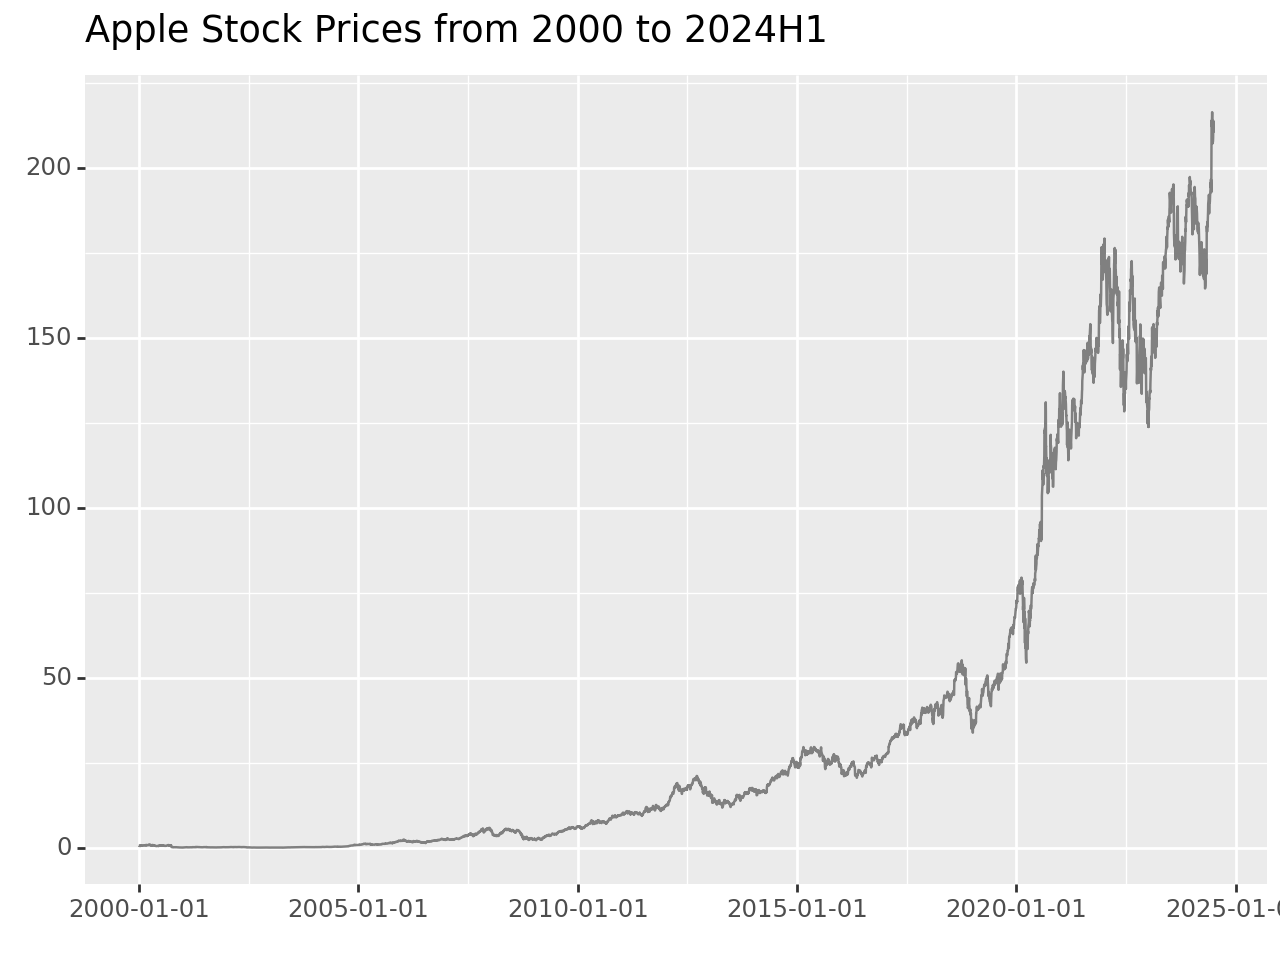

In [2]:
from plotnine import ggplot, geom_line, aes, labs

prices_figure = (
    ggplot(prices,
           aes(y="adjusted", x="date")) +
    geom_line(color="gray") +
    labs(x="", y="",
         title="Apple Stock Prices from 2000 to 2024H1")
)

prices_figure.draw()

The following steps to calculate returens from price series is usefule:

In [3]:
returns = (
    prices
    .sort_values("date")
    .assign(ret=lambda x: x["adjusted"].pct_change())
    .get(["symbol", "date", "ret"])
)

returns.round(3)

,symbol,date,ret
0,AAPL,2000-01-03,NaN
1,AAPL,2000-01-04,-0.084
2,AAPL,2000-01-05,0.015
3,AAPL,2000-01-06,-0.087
4,AAPL,2000-01-07,0.047
...,...,...,...
6156,AAPL,2024-06-24,0.003
6157,AAPL,2024-06-25,0.004
6158,AAPL,2024-06-26,0.020
6159,AAPL,2024-06-27,0.004


To delete the sample with value NA, use the method `.dropna()`:

In [4]:
returns = returns.dropna()

returns.round(3)

,symbol,date,ret
1,AAPL,2000-01-04,-0.084
2,AAPL,2000-01-05,0.015
3,AAPL,2000-01-06,-0.087
4,AAPL,2000-01-07,0.047
5,AAPL,2000-01-10,-0.018
...,...,...,...
6156,AAPL,2024-06-24,0.003
6157,AAPL,2024-06-25,0.004
6158,AAPL,2024-06-26,0.020
6159,AAPL,2024-06-27,0.004


Unlike the `stargazer`library of R, the `stargazer` package in Python does not support generate summary statistics tables (See https://github.com/StatsReporting/stargazer/issues/104). We can only generate summary statistics with the `.describe()` method of dataframe:

In [5]:
returns["ret"].describe()

count    6160.000000
mean        0.001211
std         0.024583
min        -0.518692
25%        -0.009992
50%         0.000889
75%         0.012714
max         0.139049
Name: ret, dtype: float64

We can turn it to a dataframe and transpose it for better readability:

In [6]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,6160.0,0.001,0.025,-0.519,-0.01,0.001,0.013,0.139


It also supports exporting to $\LaTeX$ format with the `.to_latex()` method. 

To compute these statistics for each year individually, use `.groupby()` together with `.dt.year`:

In [7]:
(
    returns["ret"]
    .groupby(returns["date"].dt.year)
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2000,251.0,-0.003,0.055,-0.519,-0.034,-0.002,0.027,0.137
2001,248.0,0.002,0.039,-0.172,-0.023,-0.001,0.027,0.129
2002,252.0,-0.001,0.031,-0.150,-0.019,-0.003,0.018,0.085
2003,252.0,0.002,0.023,-0.081,-0.012,0.002,0.015,0.113
2004,252.0,0.005,0.025,-0.056,-0.009,0.003,0.016,0.132
2005,252.0,0.003,0.024,-0.092,-0.010,0.003,0.017,0.091
2006,251.0,0.001,0.024,-0.063,-0.014,-0.002,0.014,0.118
2007,251.0,0.004,0.024,-0.070,-0.009,0.003,0.018,0.105
2008,253.0,-0.003,0.037,-0.179,-0.024,-0.001,0.019,0.139


We can plot the time series and distribution of the returns:

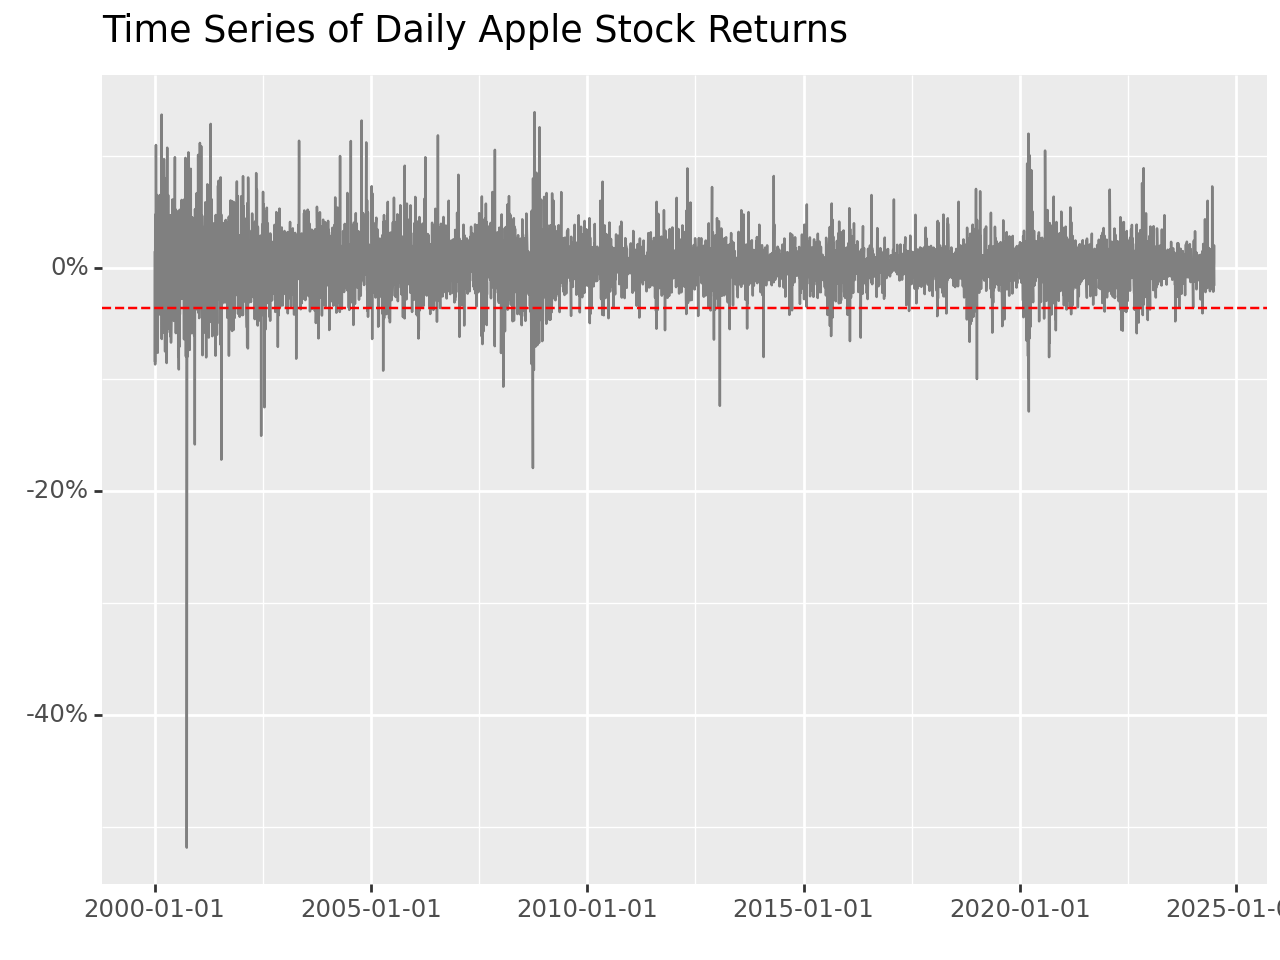

In [8]:
from plotnine import ggplot, geom_line, geom_histogram, geom_hline, geom_vline, aes, labs, scale_x_continuous, scale_y_continuous
from mizani.formatters import percent_format

quantile_05 = returns["ret"].quantile(0.05)

returns_ts_figure = (
    ggplot(returns,
           aes(y="ret", x="date")) +
    geom_line(color="gray") +
    geom_hline(aes(yintercept=quantile_05),
               linetype="dashed",
               color="red") +
    labs(x="", y="",
         title="Time Series of Daily Apple Stock Returns") +
    scale_y_continuous(labels=percent_format())
)

returns_ts_figure.draw()

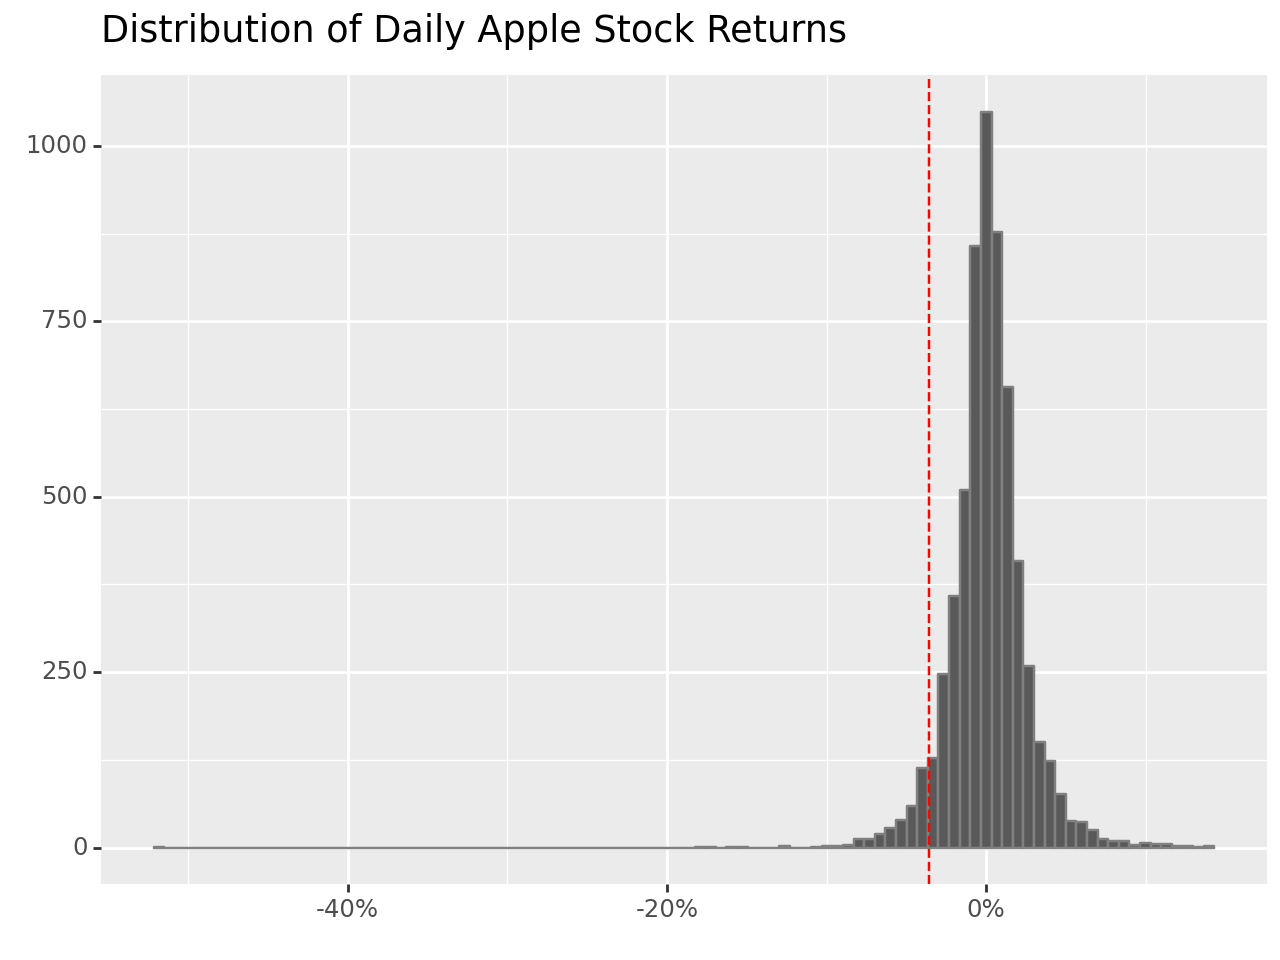

In [9]:
returns_dist_figure = (
    ggplot(returns, aes(x="ret")) +
    geom_histogram(bins=100,
                   color="gray") +
    geom_vline(aes(xintercept=quantile_05),
               linetype="dashed",
               color="red") +
    labs(x="", y="",
         title="Distribution of Daily Apple Stock Returns") +
    scale_x_continuous(labels=percent_format())
)

returns_dist_figure.draw()

## 2.2 Scaling Up the Analysis


Download a table with DOW Jones constituents (30 stock symbols, the url is updated):

In [10]:
url = (
    "https://www.ssga.com/us/en/intermediary/library-content/products/fund-data/etfs/us/holdings-daily-us-en-dia.xlsx"
)

symbols = (
    pd.read_excel(
        url, 
        skiprows=4, 
        nrows=30
    )
    .get("Ticker")
    .tolist()
)

symbols

['UNH',
 'GS',
 'MSFT',
 'HD',
 'CAT',
 'AMGN',
 'MCD',
 'V',
 'CRM',
 'AXP',
 'AAPL',
 'TRV',
 'JPM',
 'HON',
 'IBM',
 'AMZN',
 'BA',
 'PG',
 'JNJ',
 'CVX',
 'MMM',
 'MRK',
 'DIS',
 'NKE',
 'WMT',
 'KO',
 'DOW',
 'CSCO',
 'VZ',
 'INTC']

The following code are different from that in the book (and does not work inmy experience). Downlaod prices for all these stocks and keep the adjusted close prices, and turn it from wide to long:

In [11]:
raw = (
    yf.download(
        tickers=symbols,
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
)

adj_prices = (
    raw
     ["Adj Close"]
    .reset_index(drop=False)
)

index_prices = (
    pd.melt(
        adj_prices,
        id_vars=["Date"],
        value_vars=symbols,
        value_name="adjusted"
    )
    .rename(columns={
        "Date": "date",
        "Ticker": "symbol"
    })
)

index_prices.sort_values(["symbol", "date"])

,date,symbol,adjusted
61610,2000-01-03,AAPL,0.844004
61611,2000-01-04,AAPL,0.772846
61612,2000-01-05,AAPL,0.784155
61613,2000-01-06,AAPL,0.716296
61614,2000-01-07,AAPL,0.750226
...,...,...,...
154020,2024-06-24,WMT,68.704170
154021,2024-06-25,WMT,67.228371
154022,2024-06-26,WMT,68.095901
154023,2024-06-27,WMT,67.687065


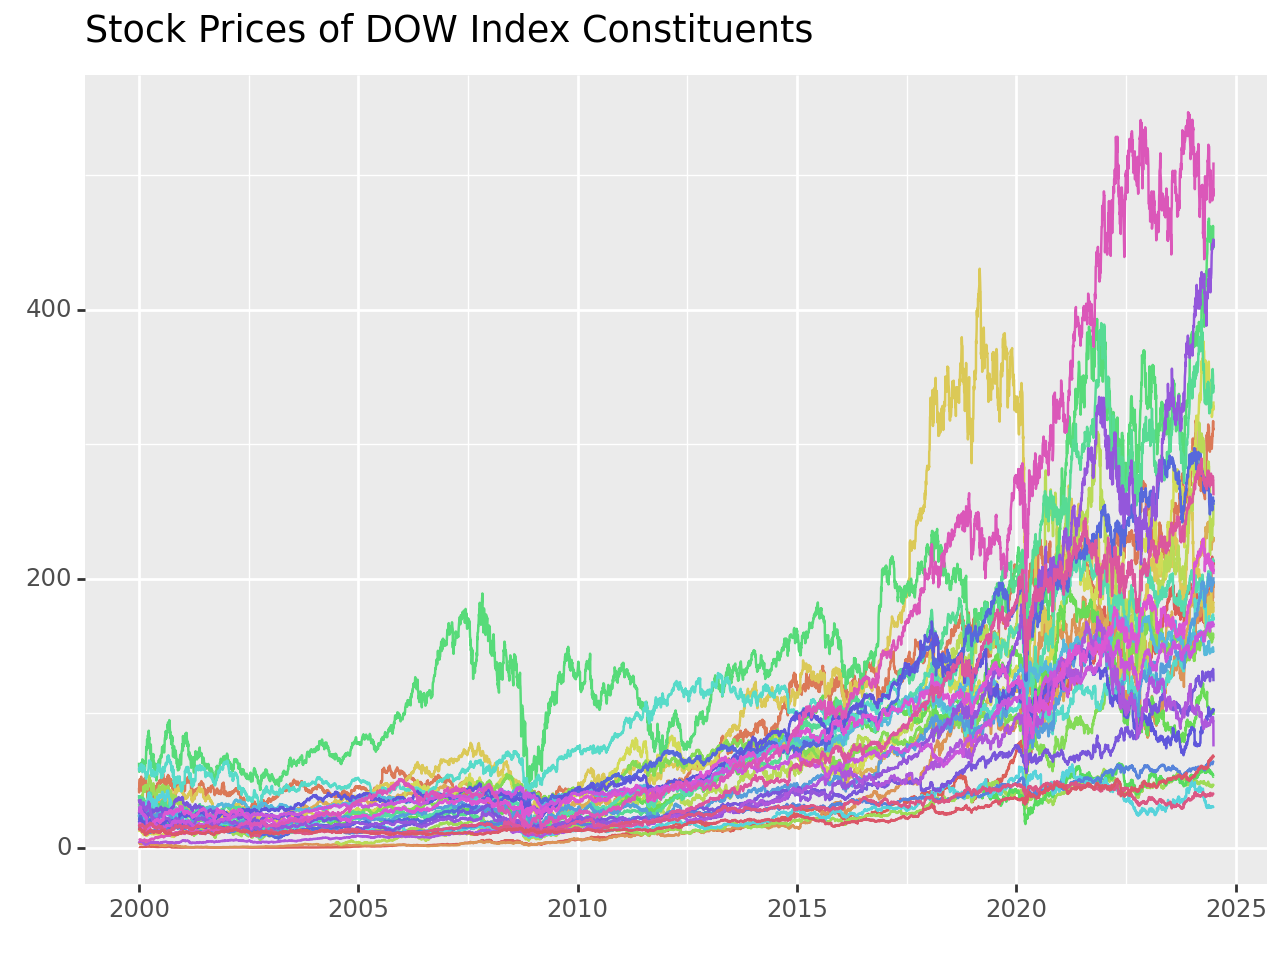

In [12]:
from plotnine import ggplot, geom_line, aes, labs, scale_x_datetime, theme
from mizani.breaks import date_breaks
from mizani.formatters import date_format

index_prices_figure = (
    ggplot(index_prices,
    aes(y="adjusted", x="date", color="symbol")) +
    geom_line() +
    labs(x="", y="", color="",
         title="Stock Prices of DOW Index Constituents") +
    theme(legend_position="none") +
    scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)

index_prices_figure.draw()

To compute the returns, use `.groupby()` such that the `assign()` command is performed to calculate the returns for each symbol individually (we specify `fill_method=None` to avoid warning message):

In [13]:
all_returns = (
    index_prices
    .assign(ret=lambda x: x.groupby("symbol")["adjusted"].pct_change(fill_method=None))
    .get(["symbol", "date", "ret"])
    .dropna(subset="ret")
)

all_returns

,symbol,date,ret
1,UNH,2000-01-04,-0.012791
2,UNH,2000-01-05,-0.002355
3,UNH,2000-01-06,0.036600
4,UNH,2000-01-07,0.117312
5,UNH,2000-01-10,-0.017329
...,...,...,...
184825,INTC,2024-06-24,-0.016726
184826,INTC,2024-06-25,0.005561
184827,INTC,2024-06-26,-0.006506
184828,INTC,2024-06-27,0.001637


These returns can also be summarised with the method `.describe()`:

In [14]:
(
    all_returns
    .groupby("symbol")["ret"]
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,6160.0,0.001,0.025,-0.519,-0.010,0.001,0.013,0.139
AMGN,6160.0,0.001,0.019,-0.134,-0.009,0.000,0.009,0.151
AMZN,6160.0,0.001,0.031,-0.248,-0.012,0.000,0.014,0.345
AXP,6160.0,0.001,0.023,-0.176,-0.009,0.000,0.010,0.219
BA,6160.0,0.001,0.022,-0.238,-0.010,0.001,0.011,0.243
CAT,6160.0,0.001,0.020,-0.145,-0.010,0.001,0.011,0.147
CRM,5038.0,0.001,0.027,-0.271,-0.012,0.001,0.014,0.260
CSCO,6160.0,0.000,0.023,-0.162,-0.009,0.000,0.010,0.244
CVX,6160.0,0.001,0.017,-0.221,-0.008,0.001,0.009,0.227


## 2.3 Other Forms of Data Aggregation

Extract the volume data and merge it to the adjusted closed price data:

In [15]:
volumes = (
    raw
     ["Volume"]
    .reset_index(drop=False)
)

index_volumes = (
    pd.melt(
        volumes,
        id_vars=["Date"],
        value_vars=symbols,
        value_name="volume"
    )
    .rename(columns={
        "Date": "date",
        "Ticker": "symbol"
    })
)

prices_volumes = (
    pd.merge(index_prices, index_volumes, on=["date", "symbol"])
)

prices_volumes.sort_values(["symbol", "date"])

,date,symbol,adjusted,volume
61610,2000-01-03,AAPL,0.844004,535796800.0
61611,2000-01-04,AAPL,0.772846,512377600.0
61612,2000-01-05,AAPL,0.784155,778321600.0
61613,2000-01-06,AAPL,0.716296,767972800.0
61614,2000-01-07,AAPL,0.750226,460734400.0
...,...,...,...,...
154020,2024-06-24,WMT,68.704170,12470400.0
154021,2024-06-25,WMT,67.228371,20904000.0
154022,2024-06-26,WMT,68.095901,14177500.0
154023,2024-06-27,WMT,67.687065,12899200.0


Now we can calculate approximately the aggregate trading volume (and its lag) in billion USD:

In [16]:
trading_volume = (
    prices_volumes
    .assign(trading_volume=lambda x: (x["adjusted"]*x["volume"])/1e9)
    .groupby("date")
    ["trading_volume"]
    .sum()
    .reset_index()
    .assign(trading_volume_lag=lambda x: x["trading_volume"].shift(periods=1))
)

trading_volume

,date,trading_volume,trading_volume_lag
0,2000-01-03,11.585040,NaN
1,2000-01-04,10.704525,11.585040
2,2000-01-05,13.732861,10.704525
3,2000-01-06,10.181605,13.732861
4,2000-01-07,10.990659,10.181605
...,...,...,...
6156,2024-06-24,66.794225,138.728032
6157,2024-06-25,58.693827,66.794225
6158,2024-06-26,59.635562,58.693827
6159,2024-06-27,60.240114,59.635562


Let's plot the time series of the aggregate trading volume:

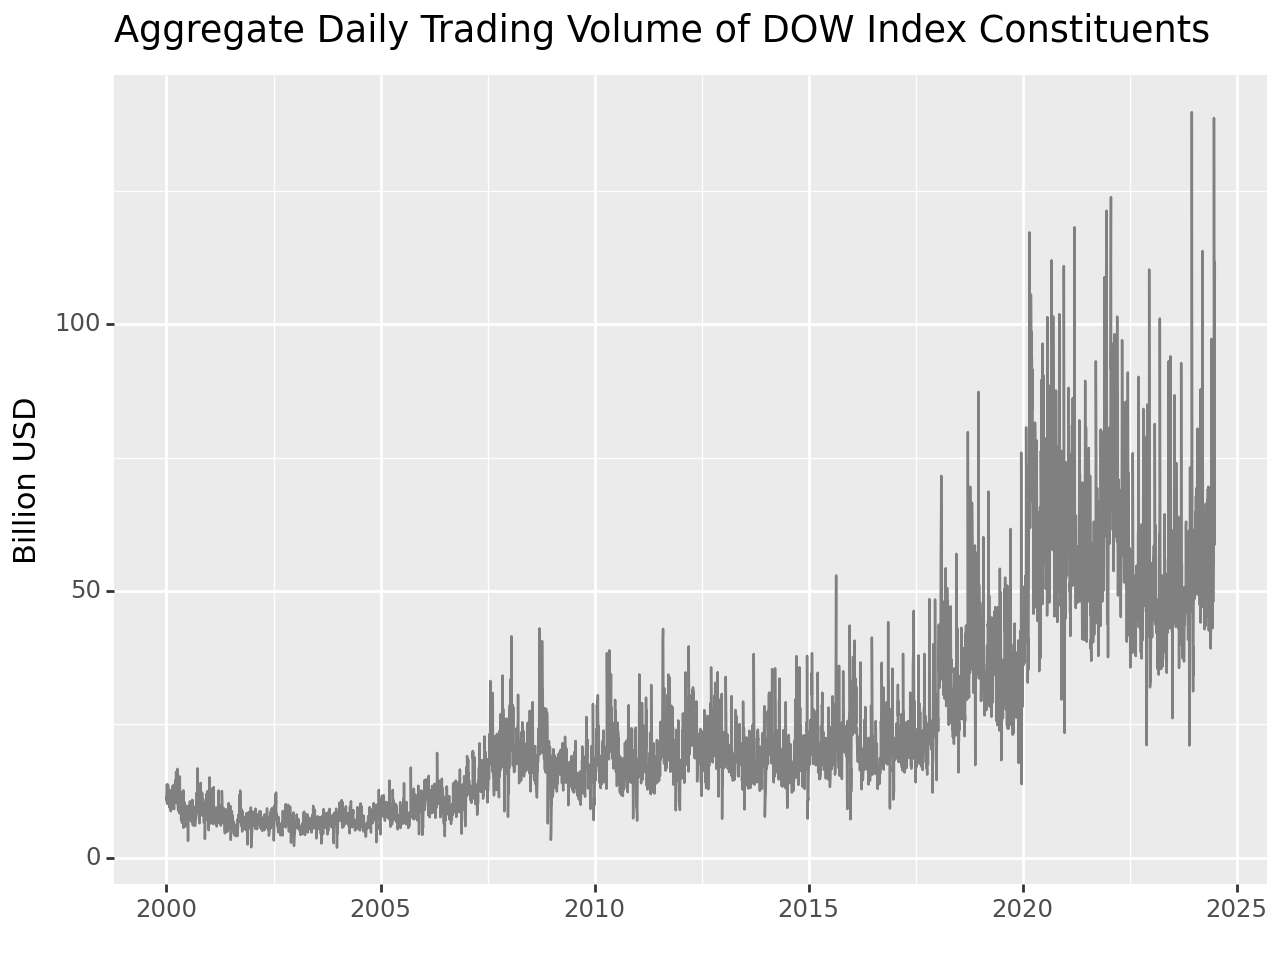

In [17]:
from plotnine import ggplot, geom_line, aes, labs, scale_x_datetime

trading_volume_figure = (
    ggplot(
        trading_volume,
        aes(x="date", y="trading_volume")) +
    geom_line(color="gray") +
    labs(x="", y="Billion USD", 
         title="Aggregate Daily Trading Volume of DOW Index Constituents") +
    scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)

trading_volume_figure.draw()

To illustrate the persistence of trading volume, plot volume on day $t$ against volume on day $t-1$:

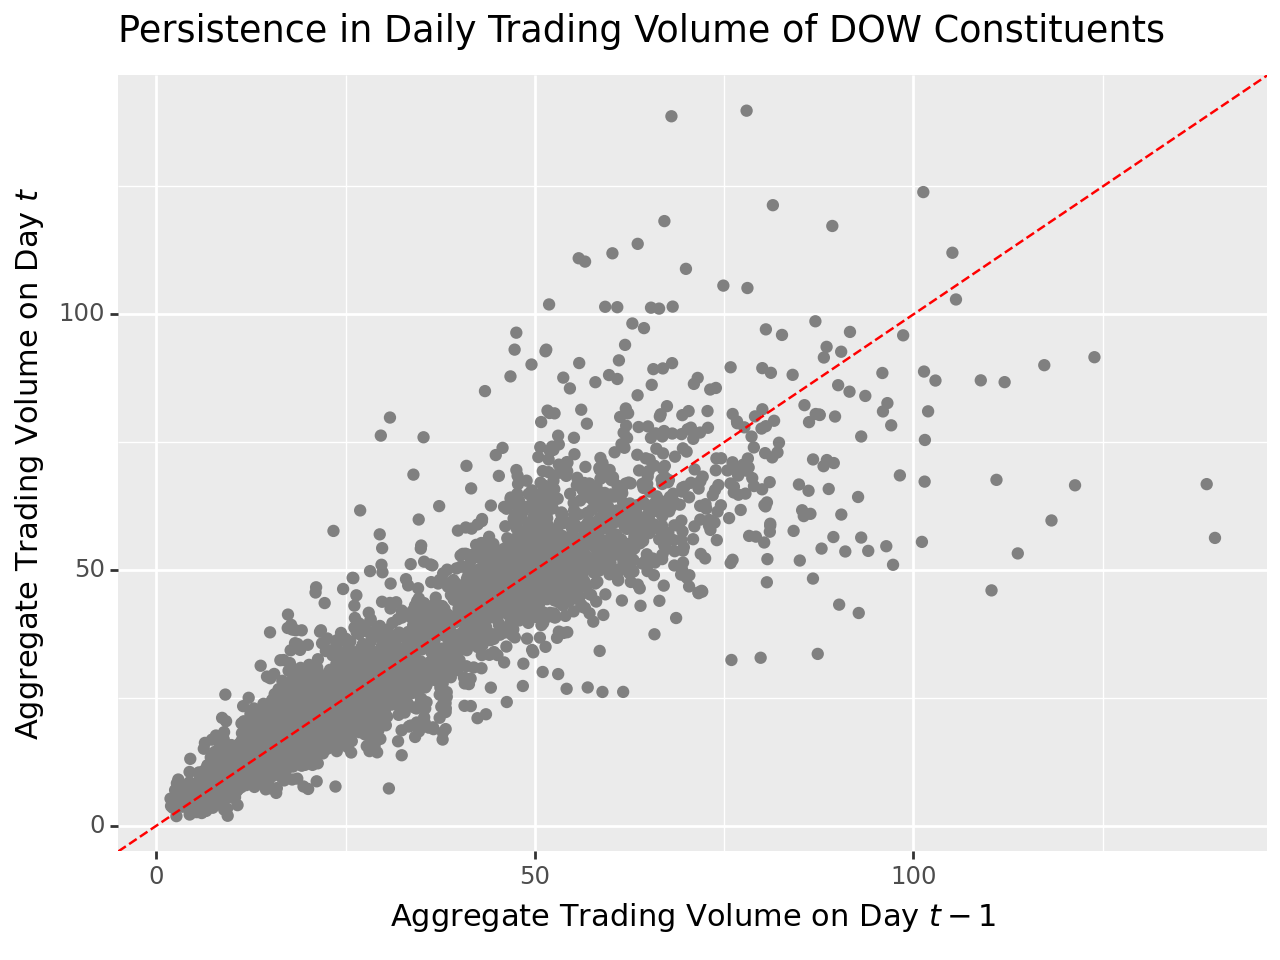

In [18]:
from plotnine import ggplot, geom_point, geom_abline, aes, labs

trading_volume_persistence_figure = (
    ggplot(
        trading_volume.dropna(subset="trading_volume_lag"),
        aes(x="trading_volume_lag", y="trading_volume")) +
    geom_point(color="gray") +
    geom_abline(aes(intercept=0, slope=1), linetype="dashed", color="red") +
    labs(x="Aggregate Trading Volume on Day $t-1$",
         y="Aggregate Trading Volume on Day $t$",
         title="Persistence in Daily Trading Volume of DOW Constituents")
)

trading_volume_persistence_figure.draw()

## 2.4 Portfolio Choice Problems

To obtain an example of efficient frontier, we work with a balanced panel. We exclude DOW conmstituents for which we do not have price data on every trading day and count the trading days (here I modify the code to avoid warning caused by DataFrameGroupBy.apply, see https://stackoverflow.com/questions/77969964/deprecation-warning-with-groupby-apply):

In [19]:
prices = (
    index_prices
    .assign(Symbol=index_prices.symbol)
    .groupby("Symbol")
    .apply(lambda x: x.assign(counts=x["adjusted"].dropna().count()), include_groups=False)
    .reset_index(drop=True)
    .query("counts == counts.max()")
)

prices

,date,symbol,adjusted,counts
0,2000-01-03,AAPL,0.844004,6161
1,2000-01-04,AAPL,0.772846,6161
2,2000-01-05,AAPL,0.784155,6161
3,2000-01-06,AAPL,0.716296,6161
4,2000-01-07,AAPL,0.750226,6161
...,...,...,...,...
184825,2024-06-24,WMT,68.704170,6161
184826,2024-06-25,WMT,67.228371,6161
184827,2024-06-26,WMT,68.095901,6161
184828,2024-06-27,WMT,67.687065,6161


We convert it to a matrix of monthly returns (calculated from the prices at the end of each month):

In [20]:
returns_matrix = (
    prices
    .pivot(columns="symbol", values="adjusted", index="date")
    .resample("ME")
    .last()
    .pct_change()
    .dropna()
)

returns_matrix

symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GS,...,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WMT
date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,0.104820,0.070657,0.066796,-0.185509,-0.167100,-0.173785,0.207192,-0.099322,-0.063683,0.009550,...,-0.150502,-0.051976,-0.217011,-0.086845,-0.375000,-0.130489,-0.258799,-0.035377,-0.209889,-0.109589
2000-03-31,0.184841,-0.099908,-0.027223,0.109921,0.023689,0.124777,0.169740,0.237657,0.213235,0.137838,...,0.177165,0.004253,0.013914,0.188811,0.395944,-0.354196,0.538991,0.166887,0.249042,0.160432
2000-04-30,-0.086516,-0.087576,-0.176306,0.005507,0.049587,0.008140,-0.103274,-0.079107,0.057576,-0.112879,...,0.018395,-0.021877,0.118712,-0.343529,0.096215,0.057769,0.043956,0.118449,-0.012387,-0.019912
2000-05-31,-0.322922,0.136161,-0.124575,0.083611,-0.012138,-0.030111,-0.178724,0.093551,-0.032952,-0.211126,...,-0.059113,-0.003685,0.077909,-0.103046,-0.012950,0.112970,0.052631,0.118088,-0.118750,0.040632
2000-06-30,0.247024,0.104126,-0.248383,-0.034722,0.070400,-0.114379,0.116356,-0.082489,-0.080000,0.288445,...,-0.080279,-0.032070,0.026800,0.278721,-0.069998,-0.146616,-0.082937,0.150042,-0.039007,0.001092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,-0.018543,-0.121840,0.138918,0.093056,-0.034685,0.112051,-0.036070,0.042316,0.161687,0.020304,...,0.004178,-0.007418,0.052741,0.042318,0.023638,0.011455,0.045420,-0.035448,-0.055018,0.064024
2024-03-31,-0.051286,0.038309,0.020480,0.037690,-0.052670,0.097227,0.031838,0.037695,0.096612,0.073615,...,-0.035343,0.151433,0.044333,0.017116,-0.092507,0.020825,0.046288,0.006180,0.048476,0.030113
2024-04-30,-0.006706,-0.036508,-0.029826,0.031029,-0.130318,-0.083619,-0.051015,0.022379,-0.092024,0.021595,...,-0.031601,0.088206,-0.020690,-0.074610,-0.018302,0.012350,-0.078126,-0.022236,-0.043625,-0.013628


Now we can compute the sample average return vector:
$$
\hat{\mu} = \frac{1}{T}\sum_{t=1}^{T}r_t
$$

In [21]:
mu = np.array(returns_matrix.mean()).T

mu

array([0.02589821, 0.00921324, 0.02221318, 0.010302  , 0.0110698 ,
       0.01582554, 0.00535255, 0.00986959, 0.00728343, 0.01073994,
       0.01048033, 0.01052534, 0.0062682 , 0.00535707, 0.00745709,
       0.01068869, 0.00631345, 0.0101916 , 0.00749805, 0.00704821,
       0.01242953, 0.01293805, 0.00762154, 0.01097159, 0.0180973 ,
       0.00483414, 0.00740766])

and the sample covariance matrix:
$$
\hat{\Sigma} = \frac{1}{T-1}\sum_{t=1}^{T}\left(r_t - \hat{\mu}\right)\left(r_t - \hat{\mu}\right)^{\prime}
$$

In [22]:
sigma = np.array(returns_matrix.cov())

sigma

array([[ 1.24660346e-02,  1.42969618e-03,  5.94143392e-03,
         2.93612269e-03,  1.94948198e-03,  2.52145931e-03,
         3.95932918e-03,  1.88480667e-03,  2.99682137e-03,
         4.57912466e-03,  2.49787470e-03,  2.00742226e-03,
         3.39325928e-03,  5.86653665e-03,  4.56214459e-04,
         2.80843194e-03,  3.67388501e-04,  1.23725338e-03,
         1.68046433e-03, -1.93689277e-04,  4.40301681e-03,
         1.94738650e-03, -1.81300500e-04,  1.05476873e-03,
         1.30890249e-03,  1.01879212e-03,  6.25935292e-04],
       [ 1.42969618e-03,  5.37067579e-03,  2.15728425e-03,
         1.25691767e-03,  1.27452382e-03,  1.48573935e-03,
         1.64329554e-03,  8.35513802e-04,  1.20457604e-03,
         1.90176213e-03,  1.44760648e-03,  1.38266322e-03,
         1.73319895e-03,  2.03012998e-03,  1.33365080e-03,
         1.73426982e-03,  5.38855886e-04,  8.41468802e-04,
         1.22535972e-03,  1.45742765e-03,  1.19688580e-03,
         3.37921043e-04,  1.04081023e-03,  6.28543924e-

The minimum variance portfolio weights $\omega_{\text{mvp}}$ is
$$
\omega_{\text{mvp}} = \arg\min \omega^{\prime}\Sigma\omega \text{ s.t. } \sum_{i=1}^{N} \omega_i = 1
$$
or equivalently
$$
\omega_{\text{mvp}} = \frac{\Sigma^{-1}\iota}{\iota^{\prime}\Sigma^{-1}\iota}
$$

In [23]:
N = returns_matrix.shape[1]
iota = np.ones(N)
sigma_inv = np.linalg.inv(sigma)

mvp_weights = sigma_inv @ iota
mvp_weights = mvp_weights / mvp_weights.sum()

mvp_weights

array([ 1.84124734e-02,  3.21595914e-02, -7.59114350e-03, -4.84566480e-02,
       -2.30439756e-04, -6.01876724e-02,  3.57956787e-03,  7.92012313e-02,
        2.98707749e-02,  9.02807678e-03,  5.11333588e-03, -7.23360922e-02,
        4.69052162e-02,  1.79465465e-02,  4.52376924e-02, -8.75766950e-03,
        9.42869977e-02,  5.32996818e-02,  8.88341883e-02,  1.43275738e-02,
        3.22926142e-02, -1.15459586e-02,  2.51882089e-01,  3.07709091e-02,
        9.83732132e-02,  6.66799475e-02,  1.90903903e-01])

And the expected return of the portfolio would be $\omega^{\prime}_{\text{mvp}}\mu$, while the expected volatility would be $\sqrt{\omega^{\prime}_{\text{mvp}}\Sigma\omega_{\text{mvp}}}$.

In [24]:
mvp_return = mu.T @ mvp_weights
mvp_volatility = np.sqrt(mvp_weights.T @ sigma @ mvp_weights)

mvp_moments = pd.DataFrame(
    {"value": [mvp_return, mvp_volatility]},
    index=["average_ret", "volatility"]
)

mvp_moments.round(3)

,value
average_ret,0.008
volatility,0.032


The efficient portfolio is chosen by an investor who aims to achieve minimum variance given a minimum acceptable expected return $\bar{\mu}$:
$$
\omega_{\text{eff}}\left(\bar{\mu}\right) = \arg\min \omega^{\prime}\Sigma\omega \text{ s.t. } \sum_{i=1}^{N} \omega_i = 1 \text{ and } \omega^{\prime}\mu \geq \bar{\mu},
$$
which implies
$$
\omega_{\text{eff}}\left(\bar{\mu}\right) = \omega_{\text{mvp}} + \frac{\tilde{\lambda}}{2}\left(\Sigma^{-1}\mu - \frac{D}{C}\Sigma^{-1}\iota\right)
$$
with $C = \iota^{\prime}\Sigma^{-1}\iota$, $D = \iota^{\prime}\Sigma^{-1}\mu$, and $\tilde{\lambda} = 2\frac{\bar{\mu}-D/C}{E-D^2/C}$, $E = \mu^{\prime}\Sigma^{-1}\mu$.

In [25]:
benchmark_multiple = 3
mu_bar = benchmark_multiple * mvp_return

C = iota.T @ sigma_inv @ iota
D = iota.T @ sigma_inv @ mu
E = mu.T @ sigma_inv @ mu
lambda_tilde = 2 * (mu_bar-D/C)/(E-D**2/C)

efp_weights = mvp_weights + lambda_tilde/2 * (sigma_inv @ mu - D/C * (sigma_inv @ iota))

efp_weights

array([ 0.30516628,  0.08591963,  0.1433114 , -0.09735534,  0.06048045,
        0.21259767, -0.09114977,  0.01036596, -0.18877334, -0.10492979,
        0.01212667, -0.03704465, -0.12025814, -0.23237697,  0.09053231,
        0.08757166, -0.0161171 ,  0.1089125 , -0.19581461, -0.04072171,
        0.13139499,  0.10257408,  0.20777151,  0.19495533,  0.37708624,
       -0.11066906,  0.10444384])

In [26]:
efp_return = mu.T @ efp_weights
efp_volatility = np.sqrt(efp_weights.T @ sigma @ efp_weights)

efp_moments = pd.DataFrame(
    {"value": [efp_return, efp_volatility]},
    index=["average_ret", "volatility"]
)

efp_moments.round(3)

,value
average_ret,0.024
volatility,0.057


## 2.5 The Efficient Frontier

We construct the efficient frontier with the linear combinations of $\omega_{\text{mvp}}$ and $\omega_{\text{eff}}\left(\bar\mu\right)$:
$$
\omega^* = a\omega_{\text{eff}}\left(\bar\mu\right) + \left(1-a\right)\omega_{\text{mvp}}
$$

In [29]:
len_year = 12
a = np.arange(-0.4, 2.0, 0.01)
res = pd.DataFrame(columns=["mu", "sd"], index=a).astype(float)

for i in a:
    w = (1-i) * mvp_weights + i * efp_weights
    res.loc[i, "mu"] = (w.T @ mu) * len_year
    res.loc[i, "sd"] = np.sqrt(w.T @ sigma @ w) * np.sqrt(len_year)

res

,mu,sd
-0.40,0.019496,0.128661
-0.39,0.021446,0.127850
-0.38,0.023395,0.127054
-0.37,0.025345,0.126273
-0.36,0.027295,0.125509
...,...,...
1.95,0.477657,0.335498
1.96,0.479606,0.337031
1.97,0.481556,0.338564
1.98,0.483505,0.340098


It can be visualized:

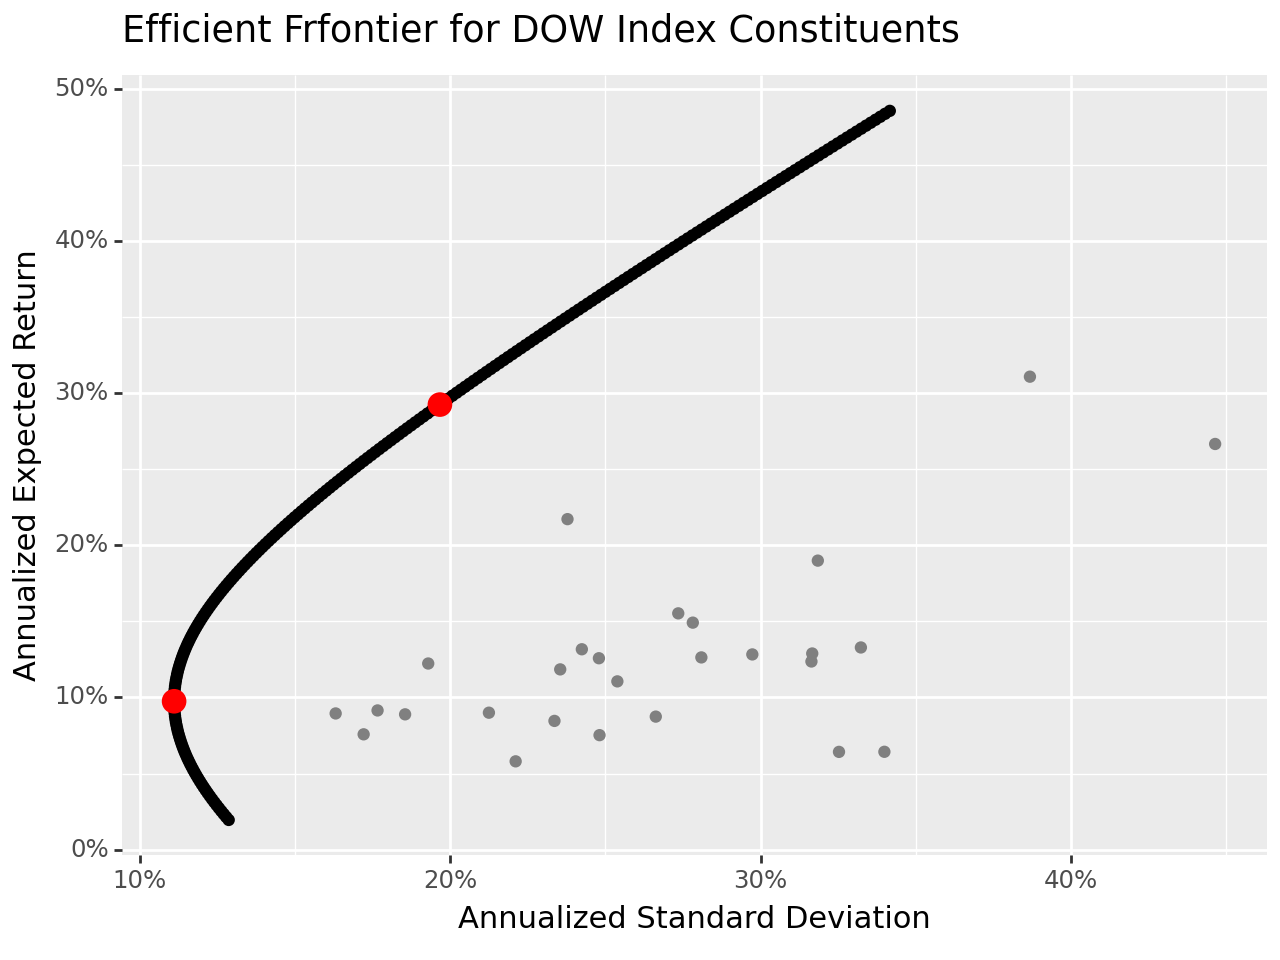

In [37]:
mvp_return = (mu.T @ mvp_weights) * len_year
mvp_volatility = (np.sqrt(mvp_weights.T @ sigma @ mvp_weights) * np.sqrt(len_year))

efp_return = mu_bar * len_year
efp_volatility = (np.sqrt(efp_weights.T @ sigma @ efp_weights) * np.sqrt(len_year))

res_figure = (
    ggplot(res, aes(x="sd", y="mu")) +
    geom_point() +
    geom_point(
        pd.DataFrame({"mu": [mvp_return, efp_return],
                      "sd": [mvp_volatility, efp_volatility]}),
        size=4,
        color="red"
    ) +
    geom_point(
        pd.DataFrame({"mu": mu*len_year,
                      "sd": np.sqrt(np.diag(sigma))*np.sqrt(len_year)}),
        color="gray"
    ) +
    labs(x="Annualized Standard Deviation",
         y="Annualized Expected Return",
         title="Efficient Frfontier for DOW Index Constituents") +
    scale_x_continuous(labels=percent_format()) +
    scale_y_continuous(labels=percent_format())
)

res_figure.draw()

## 2.6 Exercises

1. Download daily prices for another stock market symbol of your choice from Yahoo!Finance with `yfinance` package. Plot two time series of the ticker's unadjusted and adjusted closing prices. Explain the differences.

**Solution**:

We choose Johnson & Johnson:

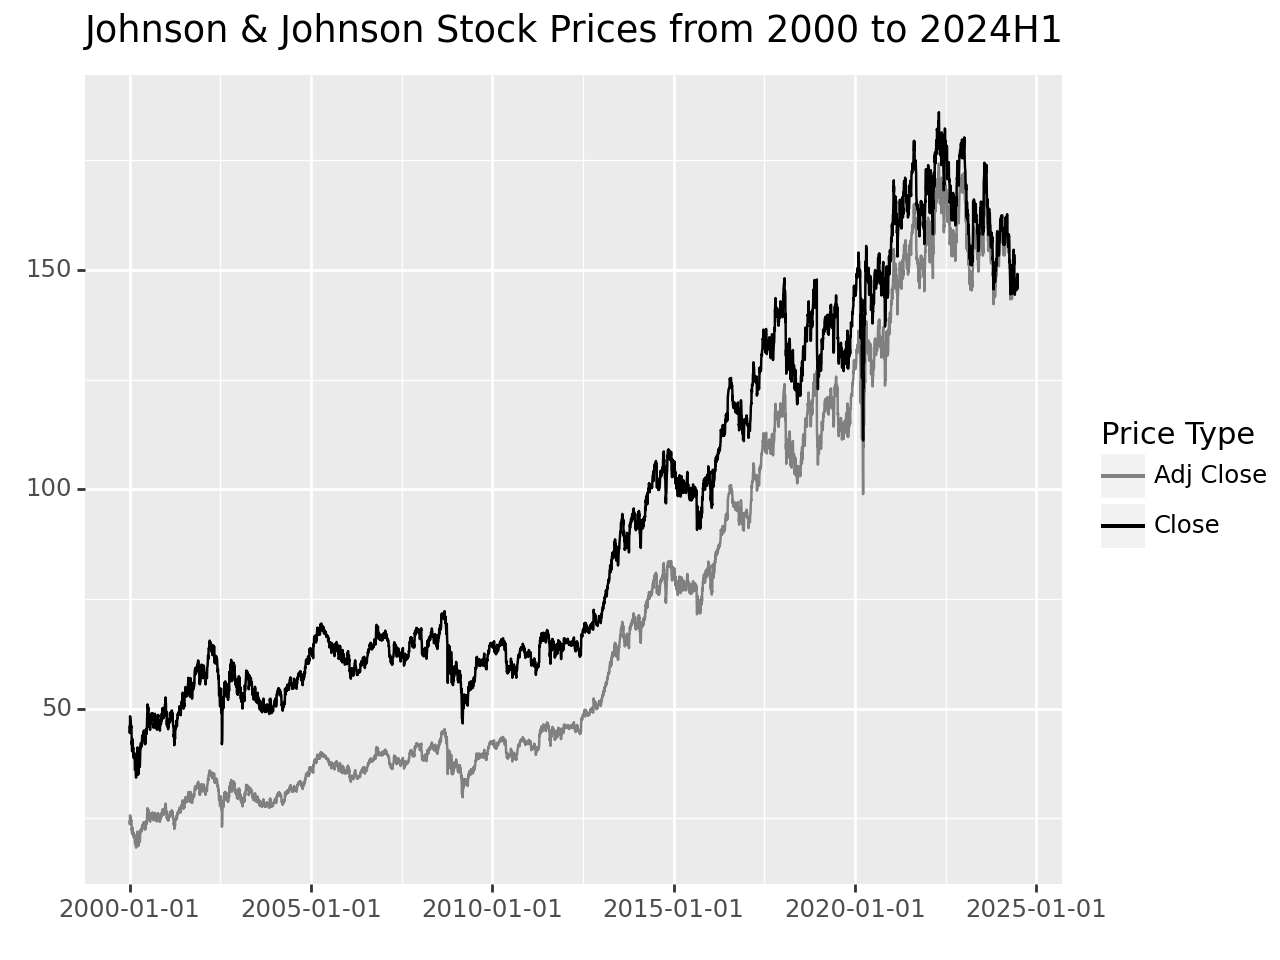

In [16]:
import pandas as pd
import yfinance as yf
from plotnine import ggplot, geom_line, aes, labs, scale_color_manual

raw = (
    yf.download(
        tickers='JNJ',
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
    .reset_index()
    .assign(Symbol="JNJ")
)

prices = (
    raw[["Date", "Symbol", "Close", "Adj Close"]]
)

prices = (
    pd.melt(
        prices,
        id_vars=["Date"],
        value_vars=["Close", "Adj Close"],
        value_name="Price"
    )
    .rename(columns={
        "variable": "Price Type"
    }
    )
)

prices_figure = (
    ggplot(
        prices,
        aes(x="Date", y="Price", color="Price Type")) +
    geom_line() +
    labs(x="", y="",
         title="Johnson & Johnson Stock Prices from 2000 to 2024H1") +
    scale_color_manual(
        values=["gray", "black"]
    )
)

prices_figure.draw()

The differences between the adjusted and raw close prices are mainly caused by dividends, stock splits, and new stock offerings.

2. Compute daily net returns for an asset of your chouce and visualize the distribution of daily returns in a histogram using 100 bins. Also, use `geom_vline()` to add a dashed red vertical line that indicates the five percent quantile of the daily returns. Compute summary statistics (mean, standard deviation, minimum and maximum) for the daily returns.

**Solution**:

We choose the NVDA stock. The distribution of daily returns can be plotted:

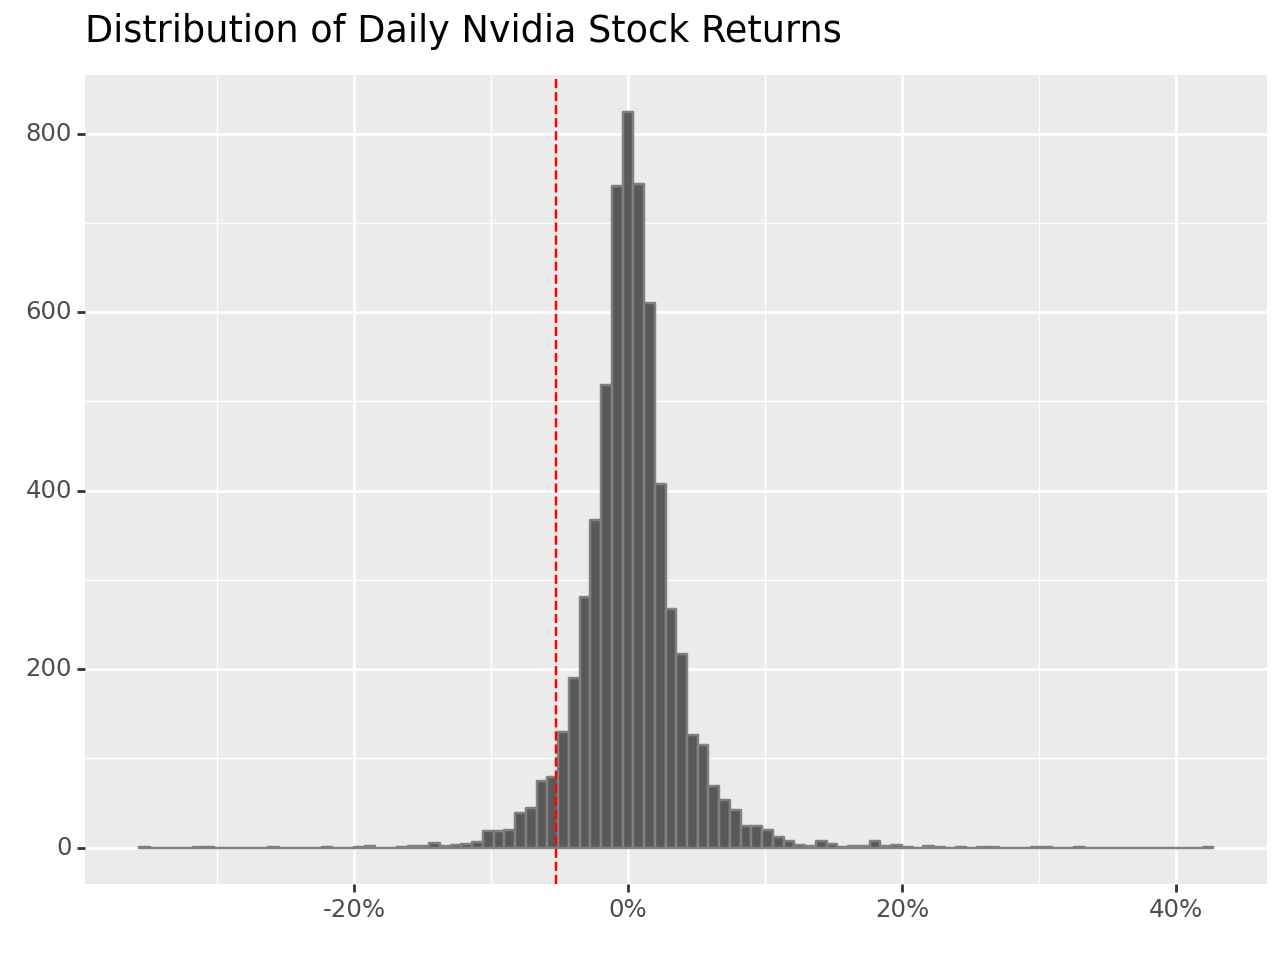

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
from plotnine import ggplot, aes, geom_histogram, geom_vline, labs, scale_x_continuous
from mizani.formatters import percent_format

raw = (
    yf.download(
        tickers='NVDA',
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
    .reset_index()
    .assign(symbol="NVDA")
)

prices = (
    raw[["symbol", "Date", "Adj Close"]]
    .rename(columns={
        "Date": "date",
        "Adj Close": "adjusted"
    })
)

returns = (
    prices
    .sort_values("date")
    .assign(ret=lambda x: x["adjusted"].pct_change())
    .get(["symbol", "date", "ret"])
    .dropna()
)

quantile_05 = returns["ret"].quantile(0.05)

returns_dist_figure = (
    ggplot(returns, aes(x="ret")) +
    geom_histogram(bins=100,
                   color="gray") +
    geom_vline(aes(xintercept=quantile_05),
               linetype="dashed",
               color="red") +
    labs(x="", y="",
         title="Distribution of Daily Nvidia Stock Returns") +
    scale_x_continuous(labels=percent_format())
)

returns_dist_figure.draw()

Its statistics:

In [23]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,6160.0,0.002,0.038,-0.352,-0.016,0.001,0.018,0.424


and its statistics for each year:

In [24]:
(
    returns["ret"]
    .groupby(returns["date"].dt.year)
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2000,251.0,0.004,0.077,-0.262,-0.041,-0.006,0.040,0.424
2001,248.0,0.007,0.058,-0.150,-0.028,0.004,0.043,0.307
2002,252.0,-0.005,0.060,-0.318,-0.040,-0.010,0.032,0.185
2003,252.0,0.004,0.044,-0.197,-0.015,0.002,0.018,0.331
2004,252.0,0.001,0.037,-0.352,-0.018,0.002,0.019,0.145
2005,252.0,0.002,0.023,-0.063,-0.012,0.001,0.014,0.111
2006,251.0,0.003,0.030,-0.077,-0.017,0.000,0.019,0.104
2007,251.0,0.002,0.029,-0.100,-0.013,0.002,0.016,0.088
2008,253.0,-0.004,0.053,-0.307,-0.031,-0.006,0.025,0.182


3. Take your code from before and generalize it such that you can perform all the computations for an arbitrary vector of tickers (e.g., `ticker = ["AAPL", "MMM", "BA"]`). Automate the download, the plot of the price time series, and create a table of return summary statistics for this arbitrary number of assets.

**Solution**:

We first download data and plot the price time series:

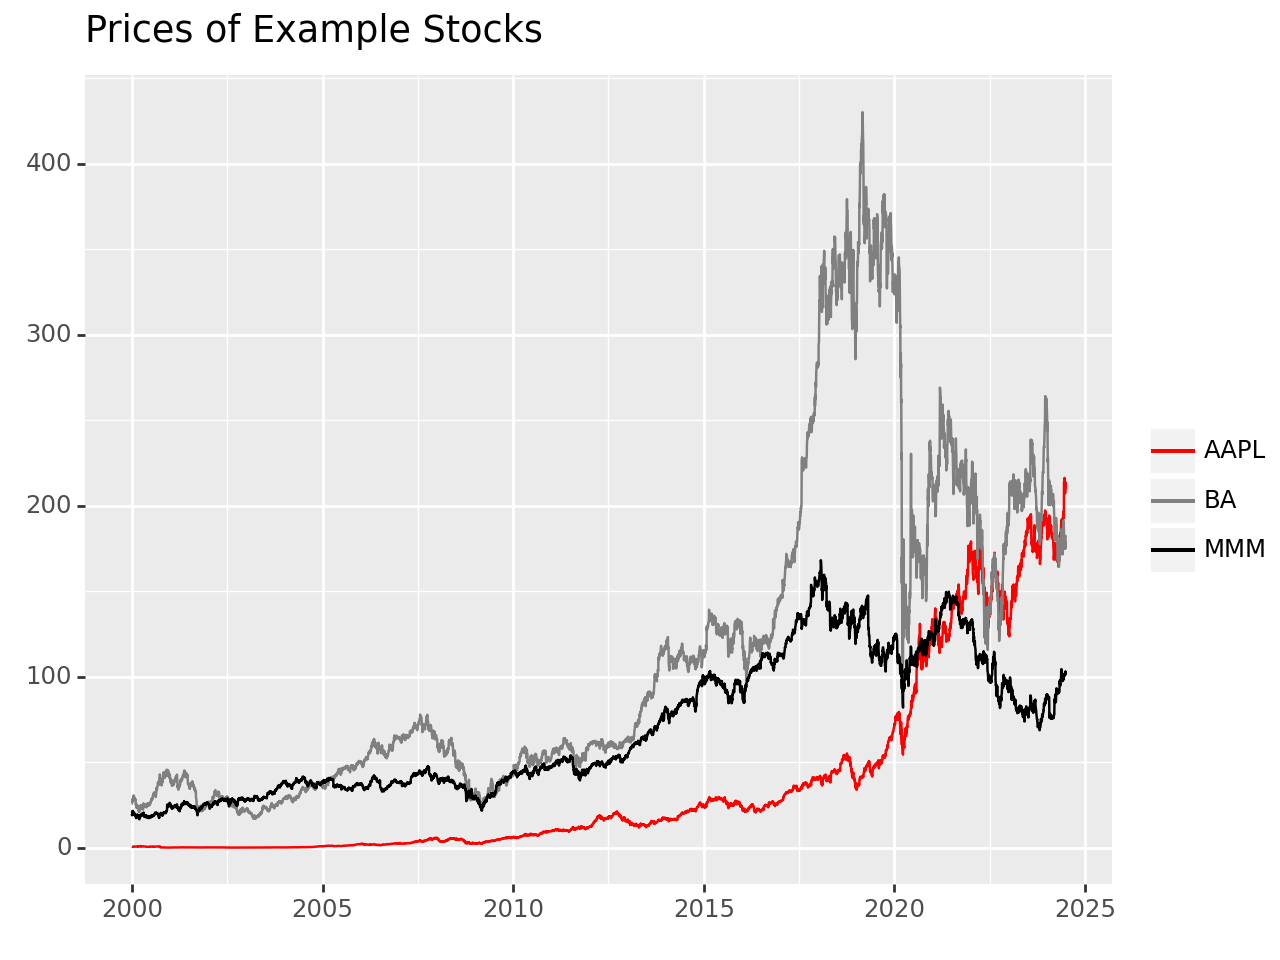

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from plotnine import ggplot, geom_line, aes, labs, scale_x_datetime, scale_color_manual
from mizani.breaks import date_breaks
from mizani.formatters import date_format

symbols = [
    "AAPL",
    "MMM",
    "BA"
]

raw = (
    yf.download(
        tickers=symbols,
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
)

adj_prices = (
    raw
     ["Adj Close"]
    .reset_index(drop=False)
)

prices = (
    pd.melt(
        adj_prices,
        id_vars=["Date"],
        value_vars=symbols,
        value_name="adjusted"
    )
    .rename(columns={
        "Date": "date",
        "Ticker": "symbol"
    })
)

prices_figure = (
    ggplot(prices,
    aes(y="adjusted", x="date", color="symbol")) +
    geom_line() +
    labs(x="", y="", color="",
         title="Prices of Example Stocks") +
    scale_x_datetime(date_breaks="5 years", date_labels="%Y") +
    scale_color_manual(values=["red", "gray", "black"])
)

prices_figure.draw()

And the table of return summary statistics:

In [3]:
returns = (
    prices
    .assign(ret=lambda x: x.groupby("symbol")["adjusted"].pct_change(fill_method=None))
    .get(["symbol", "date", "ret"])
    .dropna(subset="ret")
)

(
    returns
    .groupby("symbol")["ret"]
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,6160.0,0.001,0.025,-0.519,-0.010,0.001,0.013,0.139
BA,6160.0,0.001,0.022,-0.238,-0.010,0.001,0.011,0.243
MMM,6160.0,0.000,0.015,-0.129,-0.007,0.000,0.008,0.126


4. Are days with high aggregate trading volume often also days with large absolute returns? Find an appropriate visualization to analyze the question using the ticker `AAPL`.

**Solution**:

We continue using the above data. We compute daily aggregate traind volumes first and combine it with daily returns of `AAPL`:

In [10]:
volume = (
    raw
     ["Volume"]
    .reset_index(drop=False)
)

volumes = (
    pd.melt(
        volume,
        id_vars=["Date"],
        value_vars=symbols,
        value_name="volume"
    )
    .rename(columns={
        "Date": "date",
        "Ticker": "symbol"
    })
)

prices_volumes = (
    pd.merge(prices, volumes, on=["date", "symbol"])
    .sort_values(["symbol", "date"])
)

trading_volume = (
    prices_volumes
    .assign(trading_volume=lambda x: (x["adjusted"]*x["volume"])/1e9)
    .groupby("date")
    ["trading_volume"]
    .sum()
    .reset_index()
    .rename(columns={
        "trading_volume": "aggregate_trading_volume"
    })
)

AAPL_return = (
    returns[returns["symbol"]=="AAPL"]
    .get(["date", "ret"])
    .rename(columns={
        "ret": "AAPL_ret"
    })
)

volumes_returns = (
    pd.merge(trading_volume, AAPL_return, on="date")
)

volumes_returns

,date,aggregate_trading_volume,AAPL_ret
0,2000-01-04,0.551112,-0.084310
1,2000-01-05,0.907389,0.014633
2,2000-01-06,0.838905,-0.086538
3,2000-01-07,0.623892,0.047369
4,2000-01-10,0.539762,-0.017588
...,...,...,...
6155,2024-06-24,18.409950,0.003133
6156,2024-06-25,13.717886,0.004468
6157,2024-06-26,15.512537,0.019993
6158,2024-06-27,12.587997,0.003986


Now we can plot the relationship between daily trading volumes and daily returns: 

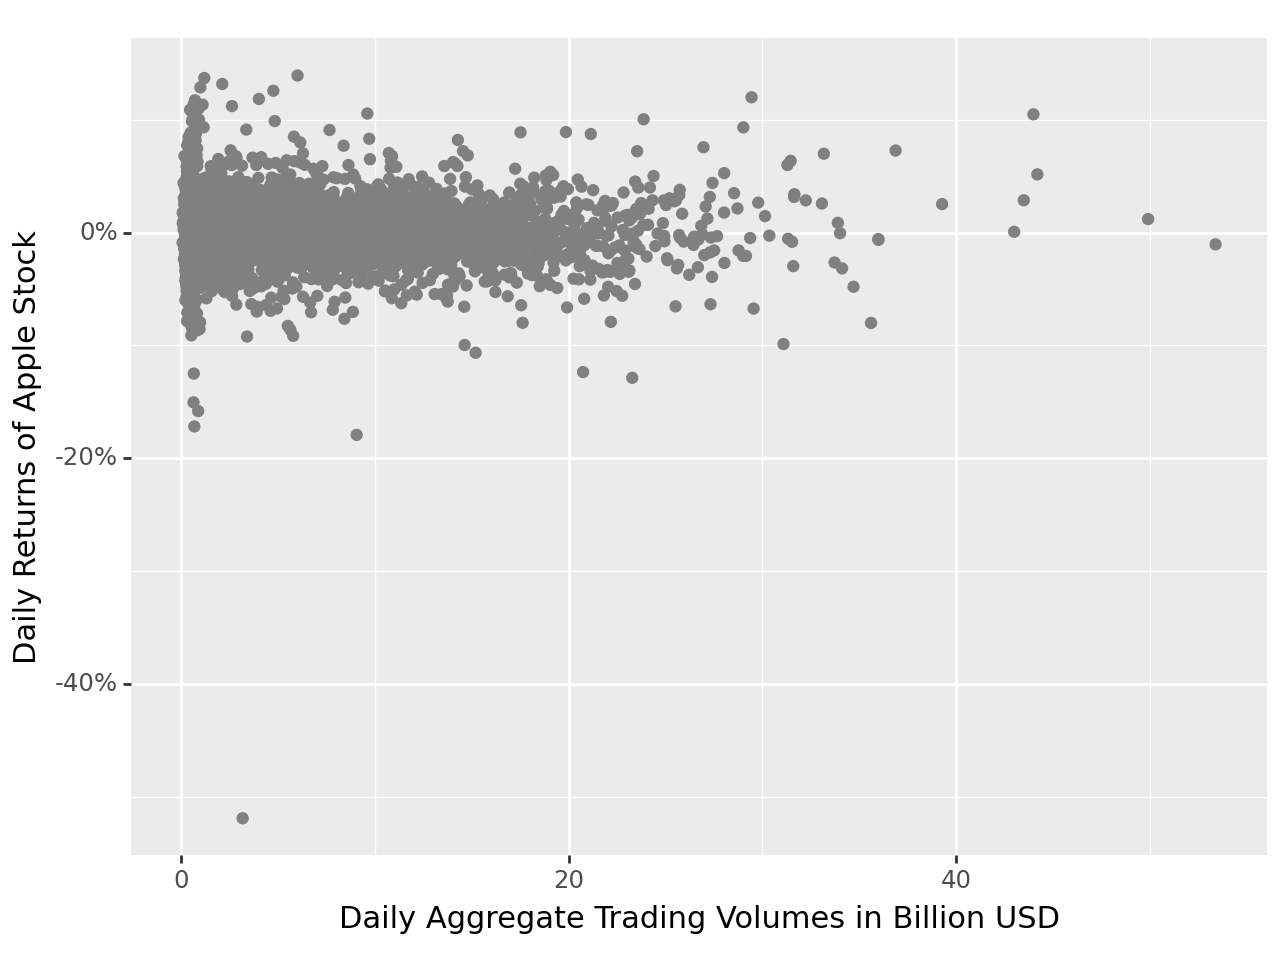

In [11]:
from plotnine import ggplot, geom_point, aes, labs, scale_y_continuous
from mizani.formatters import percent_format

volumes_returns_figure = (
    ggplot(
        volumes_returns,
        aes(x="aggregate_trading_volume", y="AAPL_ret")) +
    geom_point(color="gray") +
    labs(x="Daily Aggregate Trading Volumes in Billion USD",
         y="Daily Returns of Apple Stock",
         title="") +
    scale_y_continuous(labels=percent_format())
)

volumes_returns_figure.draw()

5. Compute monthly returns from the downloaded stock market prices. Compute the vector of historical average returns and the sample variance-covariance matrix. Compute the minimum variance portfolio weights and the portfolio volatility and average returns. Visualize the mean-variance efficient frontier. Choose one of your assets and identify the portfolio which yields the same historical volatility but achieves the highest possible average return.

**Solution**:

We still use the data above. Monthly returns of each stock:

In [12]:
monthly_return = (
    prices
    .pivot(columns="symbol", values="adjusted", index="date")
    .resample("ME")
    .last()
    .pct_change()
    .dropna()
)

monthly_return

symbol,AAPL,BA,MMM
date,,,
2000-02-29,0.104820,-0.167100,-0.051977
2000-03-31,0.184841,0.023689,0.004252
2000-04-30,-0.086517,0.049587,-0.021877
2000-05-31,-0.322922,-0.012138,-0.003685
2000-06-30,0.247024,0.070400,-0.032070
...,...,...,...
2024-02-29,-0.018543,-0.034685,-0.007418
2024-03-31,-0.051286,-0.052670,0.151433
2024-04-30,-0.006706,-0.130318,0.088206


The vector of historical average returns is

In [13]:
mu = np.array(monthly_return.mean()).T

mu

array([0.02589821, 0.0110698 , 0.00749805])

And the sample variance-covariance matrix is

In [15]:
sigma = np.array(monthly_return.cov())

sigma

array([[0.01246604, 0.00194948, 0.00168046],
       [0.00194948, 0.00920291, 0.00246425],
       [0.00168046, 0.00246425, 0.00376253]])

The minimum variance portfolio weights are

In [16]:
N = monthly_return.shape[1]
iota = np.ones(N)
sigma_inv = np.linalg.inv(sigma)

mvp_weights = sigma_inv @ iota
mvp_weights = mvp_weights / mvp_weights.sum()

mvp_weights

array([0.14558885, 0.13314742, 0.72126373])

The portfolio volatility and average returns are

In [17]:
mvp_return = mu.T @ mvp_weights
mvp_volatility = np.sqrt(mvp_weights.T @ sigma @ mvp_weights)

mvp_moments = pd.DataFrame(
    {"value": [mvp_return, mvp_volatility]},
    index=["average_ret", "volatility"]
)

mvp_moments.round(3)

,value
average_ret,0.011
volatility,0.057


We can plot the mean-variance efficient frontier:

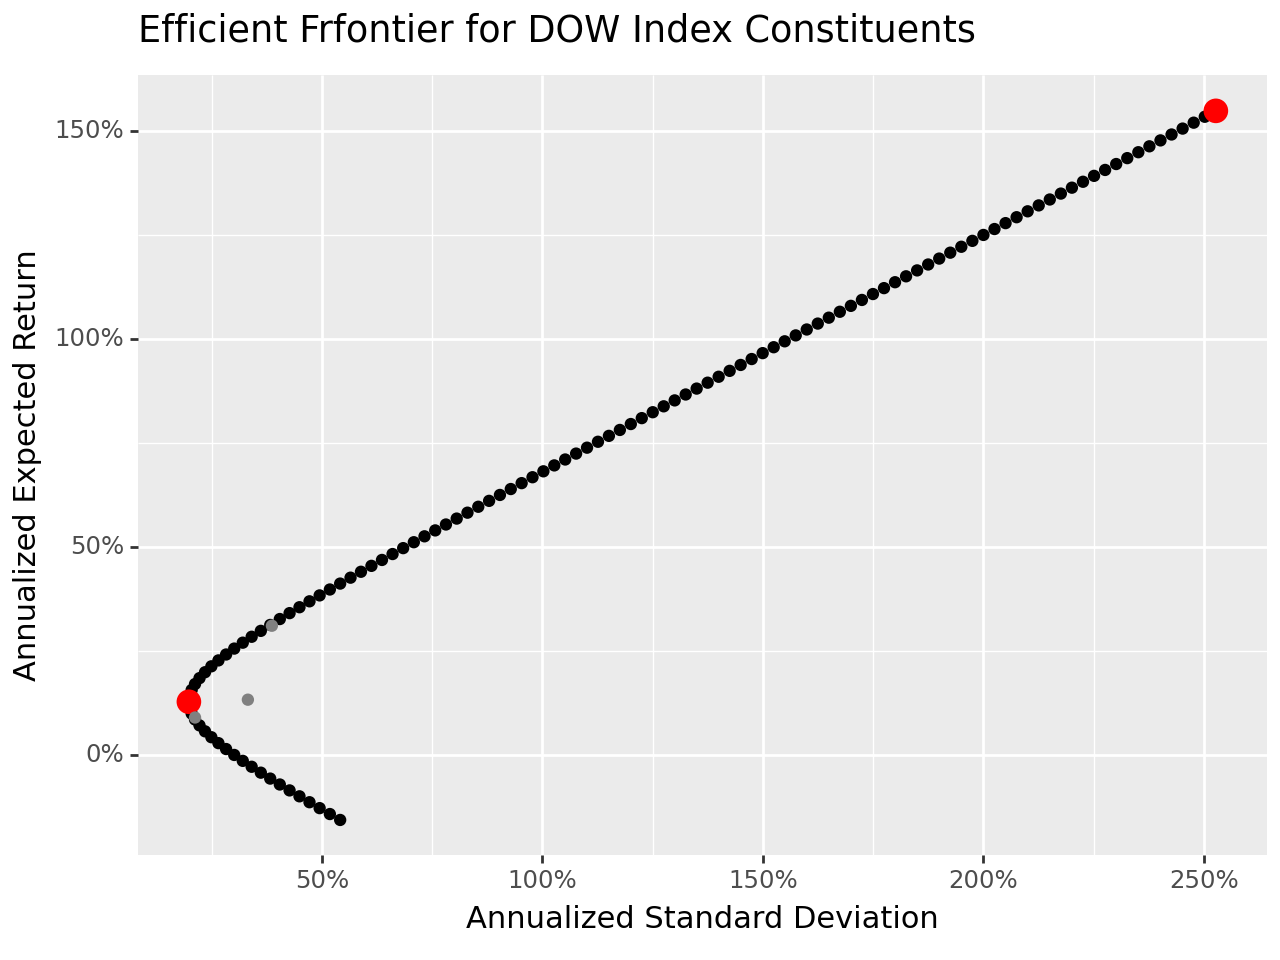

In [34]:
from plotnine import ggplot, geom_point, aes, labs, scale_x_continuous, scale_y_continuous
from mizani.formatters import percent_format

benchmark_multiple = 1.01
mu_bar = benchmark_multiple * mvp_return

C = iota.T @ sigma_inv @ iota
D = iota.T @ sigma_inv @ mu
E = mu.T @ sigma_inv @ mu
lambda_tilde = 2 * (mu_bar-D/C)/(E-D**2/C)

efp_weights = mvp_weights + lambda_tilde/2 * (sigma_inv @ mu - D/C * (sigma_inv @ iota))
efp_return = mu.T @ efp_weights
efp_volatility = np.sqrt(efp_weights.T @ sigma @ efp_weights)

len_year = 12
a = np.arange(-0.2, 1.0, 0.01)
res = pd.DataFrame(columns=["mu", "sd"], index=a).astype(float)

for i in a:
    w = (1-i) * mvp_weights + i * efp_weights
    res.loc[i, "mu"] = (w.T @ mu) * len_year
    res.loc[i, "sd"] = np.sqrt(w.T @ sigma @ w) * np.sqrt(len_year)

mvp_return = (mu.T @ mvp_weights) * len_year
mvp_volatility = (np.sqrt(mvp_weights.T @ sigma @ mvp_weights) * np.sqrt(len_year))

efp_return = mu_bar * len_year
efp_volatility = (np.sqrt(efp_weights.T @ sigma @ efp_weights) * np.sqrt(len_year))

res_figure = (
    ggplot(res, aes(x="sd", y="mu")) +
    geom_point() +
    geom_point(
        pd.DataFrame({"mu": [mvp_return, efp_return],
                      "sd": [mvp_volatility, efp_volatility]}),
        size=4,
        color="red"
    ) +
    geom_point(
        pd.DataFrame({"mu": mu*len_year,
                      "sd": np.sqrt(np.diag(sigma))*np.sqrt(len_year)}),
        color="gray"
    ) +
    labs(x="Annualized Standard Deviation",
         y="Annualized Expected Return",
         title="Efficient Frfontier for DOW Index Constituents") +
    scale_x_continuous(labels=percent_format()) +
    scale_y_continuous(labels=percent_format())
)

res_figure.draw()

For a single asset `AAPL`, its historical average return and volatitity are

In [24]:
AAPL_return = monthly_return["AAPL"].mean()
AAPL_volatility = monthly_return["AAPL"].var()

AAPL_moments = pd.DataFrame(
    {"value": [AAPL_return, AAPL_volatility]},
    index=["average_ret", "volatility"]
)

mvp_moments.round(3)

,value
average_ret,0.011
volatility,0.057


Thus we need a portfolio with volatility not larger than  0.057.